In [ ]:
!pip install tensorflow==2.13

In [ ]:
!pip install tensorflow==2.13.0

In [ ]:

import tensorflow as tf
tf.__version__


'2.13.0'

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import ResNet152V2,ResNet50,ConvNeXtLarge
from tensorflow.keras.optimizers import Adam
print('installation successful')

installation successful


In [ ]:
from google.colab import drive

drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = list(os.walk('/content/drive/MyDrive/snake_dataset'))
print(train)

[('/content/drive/MyDrive/snake_dataset', ['russell_s_viper', 'spectacled_cobra', 'travancore_wolf_snake', 'ornate_flying_snake', 'indian_rock_python', 'indian_saw_scaled_viper', 'indian_rat_snake', 'indian_common_krait_snake', 'hognose_snake', 'green_keelback_snake', 'Common_Sand_Boa', 'beaked_worm_snake', 'black_headed_snake', 'bamboo_pit_viper'], []), ('/content/drive/MyDrive/snake_dataset/russell_s_viper', [], ['russell_s_viper_272.jpg', 'russell_s_viper_184.png', 'russell_s_viper_38.jpg', 'russell_s_viper_110.jpg', 'russell_s_viper_191.jpg', 'russell_s_viper_77.jpg', 'russell_s_viper_33.jpg', 'russell_s_viper_30.jpg', 'russell_s_viper_256.jpg', 'russell_s_viper_192.jpg', 'russell_s_viper_246.jpg', 'russell_s_viper_178.jpg', 'russell_s_viper_81.jpg', 'russell_s_viper_49.jpg', 'russell_s_viper_253.jpg', 'russell_s_viper_21.jpg', 'russell_s_viper_73.jpg', 'russell_s_viper_239.jpg', 'russell_s_viper_135.jpg', 'russell_s_viper_101.jpg', 'russell_s_viper_202.jpg', 'russell_s_viper_225.j

In [ ]:
 label_names = train[0][1]
dict_labels = dict(zip(sorted(label_names), list(range(1,len(label_names)+1))))
sorted(label_names)
print(dict_labels)

{'Common_Sand_Boa': 1, 'bamboo_pit_viper': 2, 'beaked_worm_snake': 3, 'black_headed_snake': 4, 'green_keelback_snake': 5, 'hognose_snake': 6, 'indian_common_krait_snake': 7, 'indian_rat_snake': 8, 'indian_rock_python': 9, 'indian_saw_scaled_viper': 10, 'ornate_flying_snake': 11, 'russell_s_viper': 12, 'spectacled_cobra': 13, 'travancore_wolf_snake': 14}


In [ ]:
def dataset(path):  # Put path till the highest directory level
    images = []
    labels = []
    folder_list = sorted(os.listdir(path))[:14]
    for folder in tqdm(folder_list):
        try:
            value_of_label = dict_labels[folder]
            print(value_of_label, folder)
            for file in os.listdir(os.path.join(path, folder)):
                path_of_file = os.path.join(os.path.join(path, folder), file)
                image = cv2.imread(path_of_file)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (224, 224))
                images.append(image)
                labels.append(value_of_label)
        except Exception as e:
            pass
    return np.array(images, dtype='float32') / 255.0, np.array(labels)
images, labels = dataset('/content/drive/MyDrive/snake_dataset')

  0%|          | 0/14 [00:00<?, ?it/s]

1 Common_Sand_Boa


  7%|▋         | 1/14 [00:24<05:16, 24.32s/it]

2 bamboo_pit_viper


 14%|█▍        | 2/14 [00:49<05:01, 25.10s/it]

3 beaked_worm_snake


 21%|██▏       | 3/14 [01:18<04:54, 26.73s/it]

4 black_headed_snake


 29%|██▊       | 4/14 [01:35<03:49, 22.94s/it]

5 green_keelback_snake


 36%|███▌      | 5/14 [01:52<03:05, 20.65s/it]

6 hognose_snake


 43%|████▎     | 6/14 [02:06<02:26, 18.31s/it]

7 indian_common_krait_snake


 50%|█████     | 7/14 [02:28<02:16, 19.51s/it]

8 indian_rat_snake


 57%|█████▋    | 8/14 [02:46<01:55, 19.18s/it]

9 indian_rock_python


 64%|██████▍   | 9/14 [02:57<01:22, 16.45s/it]

10 indian_saw_scaled_viper


 71%|███████▏  | 10/14 [03:07<00:58, 14.56s/it]

11 ornate_flying_snake


 79%|███████▊  | 11/14 [03:28<00:49, 16.52s/it]

12 russell_s_viper


 86%|████████▌ | 12/14 [03:39<00:30, 15.00s/it]

13 spectacled_cobra


 93%|█████████▎| 13/14 [04:11<00:20, 20.10s/it]

14 travancore_wolf_snake


100%|██████████| 14/14 [04:42<00:00, 20.15s/it]


In [ ]:
im_copy=images
lb_copy=labels

In [ ]:
i=im_copy
l=lb_copy
i,l=shuffle(i,l)
print(label_names)
print(dict_labels)
label_names=sorted(label_names)

['russell_s_viper', 'spectacled_cobra', 'travancore_wolf_snake', 'ornate_flying_snake', 'indian_rock_python', 'indian_saw_scaled_viper', 'indian_rat_snake', 'indian_common_krait_snake', 'hognose_snake', 'green_keelback_snake', 'Common_Sand_Boa', 'beaked_worm_snake', 'black_headed_snake', 'bamboo_pit_viper']
{'Common_Sand_Boa': 1, 'bamboo_pit_viper': 2, 'beaked_worm_snake': 3, 'black_headed_snake': 4, 'green_keelback_snake': 5, 'hognose_snake': 6, 'indian_common_krait_snake': 7, 'indian_rat_snake': 8, 'indian_rock_python': 9, 'indian_saw_scaled_viper': 10, 'ornate_flying_snake': 11, 'russell_s_viper': 12, 'spectacled_cobra': 13, 'travancore_wolf_snake': 14}


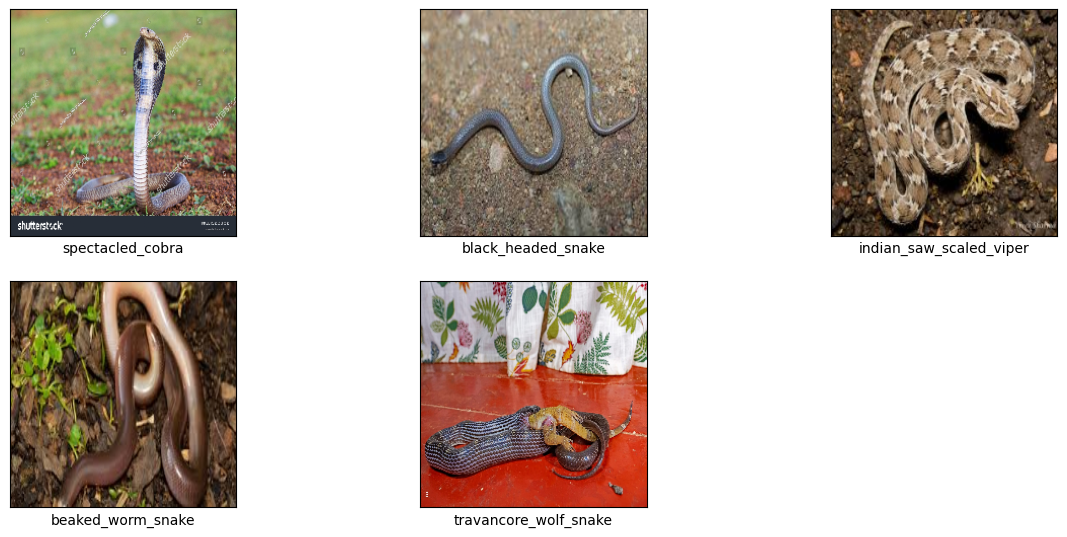

In [ ]:

# Plot some images with their labels
plt.figure(figsize=(15, 10))
for _ in range(5):
    plt.subplot(3, 3, _ + 1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    data = i[_]  # Access the shuffled images
    plt.xlabel(label_names[l[_]-1])  # Access the shuffled labels
    plt.imshow(data)


In [ ]:
import tensorflow as tf
import numpy as np

# Define CutMix function
def cutmix(images, labels, alpha=1.0):
    """
    Applies the CutMix augmentation technique to a batch of images and labels.

    Args:
        images (tf.Tensor): Batch of images with shape (batch_size, height, width, channels).
        labels (tf.Tensor): Batch of one-hot encoded labels with shape (batch_size, num_classes).
        alpha (float): Parameter for the Beta distribution. Higher values increase the area mixed.

    Returns:
        tf.Tensor, tf.Tensor: Augmented images and mixed labels.
    """
    batch_size = images.shape[0]
    indices = tf.random.shuffle(tf.range(batch_size))
    shuffled_images = tf.gather(images, indices)
    shuffled_labels = tf.gather(labels, indices)

    # Sample lambda from the Beta distribution
    lam = np.random.beta(alpha, alpha)

    # Randomly select the bounding box for the mix
    height, width = images.shape[1:3]
    cut_rat = np.sqrt(1.0 - lam)
    cut_h = int(height * cut_rat)
    cut_w = int(width * cut_rat)

    # Choose random center for the bounding box
    cx = np.random.randint(width)
    cy = np.random.randint(height)

    # Calculate the bounding box coordinates
    x1 = np.clip(cx - cut_w // 2, 0, width)
    x2 = np.clip(cx + cut_w // 2, 0, width)
    y1 = np.clip(cy - cut_h // 2, 0, height)
    y2 = np.clip(cy + cut_h // 2, 0, height)

    # Apply CutMix by combining images and adjusting labels
    mixed_images = images.numpy()
    mixed_images[:, y1:y2, x1:x2, :] = shuffled_images[:, y1:y2, x1:x2, :]
    lam = 1 - ((x2 - x1) * (y2 - y1)) / (height * width)
    mixed_labels = lam * labels + (1 - lam) * shuffled_labels

    return tf.convert_to_tensor(mixed_images), tf.convert_to_tensor(mixed_labels)

# Define CutMix data generator with class weights
def cutmix_data_generator_with_weights(generator, class_weights):
    """
    Data generator that applies CutMix augmentation and incorporates class weights.

    Args:
        generator (generator): A data generator yielding (images, labels) batches.
        class_weights (dict): A dictionary mapping class indices to weights.

    Yields:
        tuple: Augmented images, mixed labels, and batch class weights.
    """
    while True:
        images, labels = next(generator)
        images, labels = cutmix(images, labels)

        # Calculate the class weights for the current batch
        batch_class_weights = np.array([
            class_weights[np.argmax(label)] for label in labels.numpy()
        ])

        yield images, labels, batch_class_weights


In [ ]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input

image_size = (224, 224)
batch_size = 16
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,  # Increased range for better generalization
    shear_range=0.3,    # Increase shear range
    zoom_range=0.3,     # Increase zoom range
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    validation_split=0.1
)

In [ ]:


train_ds = train_datagen.flow_from_directory('/content/drive/MyDrive/snake_dataset',
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'training',
                                      color_mode="rgb")

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = train_datagen.flow_from_directory('/content/drive/MyDrive/snake_dataset',
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'validation',
                                      color_mode="rgb")

# Calculate the number of augmented images
num_augmented_images = len(train_ds) * batch_size
print(f"Total number of augmented images: {num_augmented_images}")


Found 3773 images belonging to 14 classes.
Found 413 images belonging to 14 classes.
Total number of augmented images: 3776


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = dict(enumerate(class_weights))
print(f"Class weights: {class_weights}")

# Modify train_ds generator to include class weights
train_ds_with_weights = cutmix_data_generator_with_weights(train_ds, class_weights)


Class weights: {0: 1.0346172598732326, 1: 0.8786749482401657, 2: 1.1311300639658848, 3: 1.3716871363930188, 4: 1.0417280314187531, 5: 0.7674502712477396, 6: 0.8968723584108199, 7: 0.8397309062129007, 8: 0.8995337007206443, 9: 1.3593850096092248, 10: 0.9939110070257611, 11: 1.1144957983193278, 12: 0.8995337007206443, 13: 1.1749723145071982}


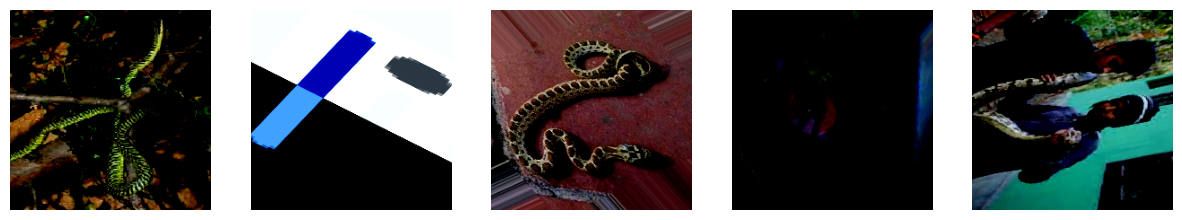

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

for i in range(5):
    image = next(train_ds)[0][0]
    image = np.squeeze(image)
    ax[i].imshow(image)
    ax[i].axis(False)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply

def se_block(input_tensor, reduction_ratio=8):
    """Squeeze-and-Excitation Block"""
    # Squeeze: Global Average Pooling
    channel_axis = -1  # TensorFlow format
    filters = input_tensor.shape[channel_axis]
    se_shape = (1, 1, filters)

    # Squeeze operation
    se = GlobalAveragePooling2D()(input_tensor)
    se = Reshape(se_shape)(se)

    # Excitation operation
    se = Dense(filters // reduction_ratio, activation="relu", use_bias=False)(se)
    se = Dense(filters, activation="sigmoid", use_bias=False)(se)

    # Scale: Apply recalibration
    output_tensor = Multiply()([input_tensor, se])
    return output_tensor


In [ ]:
from tensorflow.keras.regularizers import l2
from keras.layers import BatchNormalization
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D


base = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base.trainable = False
inputs = Input(shape=(224, 224, 3))

x = base(inputs, training=False)
x = se_block(x)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01))(x)

x = layers.BatchNormalization()(x)
x = layers.Dropout(0.65)(x)
outputs = layers.Dense(len(label_names), activation = 'softmax')(x)
res_final_model = Model(inputs, outputs)


234545216/234545216 [==============================] - 12s 0us/step


In [ ]:
'''from tensorflow.keras.optimizers.schedules import CosineDecay,ExponentialDecay
from tensorflow.keras.optimizers.schedules import CosineDecayRestarts

lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    weight_decay=0.01
)'''

'from tensorflow.keras.optimizers.schedules import CosineDecay,ExponentialDecay\nfrom tensorflow.keras.optimizers.schedules import CosineDecayRestarts\n\nlr_schedule = ExponentialDecay(\n    initial_learning_rate=1e-4,\n    weight_decay=0.01\n)'

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25, num_classes=14):
    """
    Focal Loss for multi-class classification.

    Args:
        gamma (float): Focusing parameter, default is 2.
        alpha (float): Balancing factor for class imbalance, default is 0.25.
        num_classes (int): Number of classes in your dataset (14 for your snake dataset).

    Returns:
        loss: Computed focal loss value.
    """

    def focal_loss_fixed(y_true, y_pred):
        # Clip predictions to prevent log(0) errors
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())

        # Compute cross entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Compute the focal loss component
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        return K.sum(loss, axis=1)  # sum over all classes

    return focal_loss_fixed


In [ ]:
from tensorflow.keras.callbacks import Callback
import numpy as np
import tensorflow as tf
class CustomReduceLROnPlateau(tf.keras.callbacks.Callback):
    def __init__(self, patience=5, factor=0.1, min_lr=1e-6):
        super().__init__()
        self.patience = patience
        self.factor = factor
        self.min_lr = min_lr
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_val_loss = logs.get('val_loss')
        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.wait = 0
                self.reduce_lr(epoch)

    def reduce_lr(self, epoch):
        # Get the current learning rate
        current_lr = self.model.optimizer.learning_rate.numpy()
        # Calculate the new learning rate
        new_lr = max(current_lr * self.factor, self.min_lr)

        # Set the new learning rate
        self.model.optimizer.learning_rate.assign(new_lr)

        print(f"\nEpoch {epoch + 1}: Learning rate adjusted to {new_lr:.6f}")


In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay,CosineDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,  # Start with a small learning rate
    decay_steps=10000,           # Decay steps (epochs or iterations)
    decay_rate=0.96,             # Decay rate per step
    staircase=True               # Decay happens in discrete steps
)


optimizer = Adam(learning_rate=0.001)


In [ ]:
from tensorflow.keras.optimizers import Adam

res_final_model.compile(
optimizer = optimizer,
loss=focal_loss(gamma=2.0, alpha=0.25),
metrics=['categorical_accuracy']
                         )


In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import backend as K
class ReduceLROnPlateauWithSchedule(ReduceLROnPlateau):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        # Corrected this line to access learning rate value
        current = float(self.model.optimizer.learning_rate.numpy())  # Get current learning rate

        if self.in_cooldown():
            self.cooldown_counter -= 1
            self.wait = 0

        if self.monitor_op(logs[self.monitor], self.best):
            self.best = logs[self.monitor]
            self.wait = 0
        elif not self.in_cooldown():
            self.wait += 1
            if self.wait >= self.patience:
                old_lr = float(K.get_value(self.model.optimizer.lr))
                if old_lr > self.min_lr:
                    new_lr = old_lr * self.factor
                    new_lr = max(new_lr, self.min_lr)

                    # Update learning rate schedule
                    K.set_value(self.model.optimizer.lr, ExponentialDecay(
                        initial_learning_rate=new_lr,
                        decay_steps=10000,  # Adjust as needed
                        decay_rate=0.96,    # Adjust as needed
                        staircase=True
                    ))

                    if self.verbose > 0:
                        print(f'\nEpoch {epoch + 1}: ReduceLROnPlateau reducing learning rate to {new_lr}.')
                    self.cooldown_counter = self.cooldown
                    self.wait = 0


# Define model checkpoint path and callbacks
checkpoint_path = '/content/drive/MyDrive/best_model_30epoch.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),  # Increased patience
    ModelCheckpoint(checkpoint_path, monitor='val_categorical_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_categorical_accuracy',factor=0.8,
    patience=3,
    min_lr=1e-6)
    ]


In [ ]:
print(class_weights)

{0: 1.0346172598732326, 1: 0.8786749482401657, 2: 1.1311300639658848, 3: 1.3716871363930188, 4: 1.0417280314187531, 5: 0.7674502712477396, 6: 0.8968723584108199, 7: 0.8397309062129007, 8: 0.8995337007206443, 9: 1.3593850096092248, 10: 0.9939110070257611, 11: 1.1144957983193278, 12: 0.8995337007206443, 13: 1.1749723145071982}


In [ ]:
# Compile the model before training

epochs = 30
history = res_final_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=callbacks
)


Epoch 1/30
 23/236 [=>............................] - ETA: 21:04 - loss: 4.6351 - categorical_accuracy: 0.1603

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


141/236 [================>.............] - ETA: 9:18 - loss: 2.8255 - categorical_accuracy: 0.3187

In [ ]:
import tensorflow as tf
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
def focal_loss_fixed(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

    alpha_factor = alpha * tf.ones_like(y_true)
    alpha_factor = tf.where(tf.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
    focal_weight = alpha_factor * tf.pow((1 - y_pred), gamma)
    loss = tf.reduce_mean(focal_weight * tf.keras.losses.binary_crossentropy(y_true, y_pred))
    return loss


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/best_model_30epoch.h5', custom_objects={'focal_loss': focal_loss_fixed})


In [ ]:
# Unfreeze the base model for fine-tuning

base.trainable = True


lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
loss=focal_loss(gamma=2.0, alpha=0.25),
metrics=['categorical_accuracy']
                         )

In [ ]:
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Reduce epochs for fine-tuning
    class_weight=class_weights,
    callbacks=callbacks,

)
model.save('/content/drive/MyDrive/res_final_finetuned_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
'''
# Load the model after 70 epochs

# Set the number of additional epochs
additional_epochs = 50
total_epochs = 70 + additional_epochs  # Total epochs after 70 + 50

# Continue training for 50 more epochs, starting from epoch 70
history = res_final_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,  # Total number of epochs (70 + 50)
    initial_epoch=70,  # Starting from epoch 70
    class_weight=class_weights,
    callbacks=[early_stopping, model_checkpoint],
)

# Optionally, save the model after further training
res_final_model.save('/content/drive/MyDrive/res_final_70_model.keras')'''


In [ ]:
evaluation = res_final_model.evaluate(val_ds)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_finetune.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get true labels and predicted probabilities
true_labels = []
num_batches = len(val_ds)
for i in range(num_batches):
    _, batch_labels = val_ds[i]
    true_labels.extend(np.argmax(batch_labels, axis=1))  # Assuming one-hot encoded labels

predicted_probs = res_final_model.predict(val_ds)  # Assuming val_ds is your validation dataset

# Convert one-hot encoded predicted probabilities to class labels
predicted_labels = np.argmax(predicted_probs, axis=1)


# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):  # Assuming 6 classes, adjust accordingly
    true_labels_i = np.array(true_labels) == i
    fpr[i], tpr[i], _ = roc_curve(true_labels_i, predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(6):  # Assuming 6 classes, adjust accordingly
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get true labels and predicted probabilities
true_labels = []
num_batches = len(val_ds)
for i in range(num_batches):
    _, batch_labels = val_ds[i]
    true_labels.extend(np.argmax(batch_labels, axis=1))  # Assuming one-hot encoded labels

predicted_probs = res_final_model.predict(val_ds)  # Assuming val_ds is your validation dataset

# Convert one-hot encoded predicted probabilities to class labels
predicted_labels = np.argmax(predicted_probs, axis=1)
print(predicted_labels)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):  # Assuming 6 classes, adjust accordingly
    true_labels_i = np.array(true_labels) == i
    fpr[i], tpr[i], _ = roc_curve(true_labels_i, predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(6):  # Assuming 6 classes, adjust accordingly
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow.keras.saving import register_keras_serializable

# Register focal_loss_fixed first
@register_keras_serializable()
def focal_loss_fixed(y_true, y_pred, gamma=2., alpha=0.25):
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    y_true = K.cast(y_true, K.floatx())
    cross_entropy = -y_true * K.log(y_pred)
    loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy
    return K.sum(loss, axis=1)

# Then register the wrapper function focal_loss
@register_keras_serializable()
def focal_loss(gamma=2., alpha=0.25):
    return focal_loss_fixed


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/res_final_finetuned_model.keras', custom_objects={'focal_loss': focal_loss_fixed})


In [ ]:
# Access the first batch from the DirectoryIterator
images, labels = next(iter(val_ds))

# Print the shapes and a sample
print("Images shape:", images.shape)  # Should be (batch_size, height, width, channels)
print("Labels shape:", labels.shape)  # Shape depends on encoding
print("Labels example:", labels[:5])  # Show the first 5 labels


In [ ]:
model.compile(optimizer='adam', loss=focal_loss(gamma=2.0, alpha=0.25), metrics=['categorical_accuracy'])
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/snake_dataset"
classes = os.listdir(dataset_path)
print("Classes found:", classes)


In [ ]:
predictions = model.predict(val_ds)
print("Prediction probabilities:\n", predictions)


In [ ]:
print("Class Indices from Train Dataset:", train_ds.class_indices)


In [ ]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input



In [ ]:
import json

# Load the existing JSON file
json_filename = 'model_content.json'
with open(json_filename, 'r') as f:
    existing_data = json.load(f)


In [ ]:
import cv2
import numpy as np

def predictor(img, model, class_indices):
    # Load and preprocess the image
    image = cv2.imread(img)
    if image is None:
        print(f"Error: Unable to read the image at {img}")
        return

    # Convert the image from BGR to RGB (as OpenCV loads in BGR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to match the input size expected by the model (224x224)
    image = cv2.resize(image, (224, 224))

    # Normalize the image (ensure it's in float32 format)
    image = np.array(image, dtype='float32')

    # Preprocess image (to match the model's expected input)
    image = preprocess_input(image)

    # Add the batch dimension (model expects a batch of images)
    image = np.expand_dims(image, axis=0)

    # Make the prediction
    predictions = model.`(image)

    # Get the index of the predicted class (highest probability)
    predicted_class_index = predictions.argmax()

    # Map the predicted class index to the class name
    dict_class = {v: k for k, v in class_indices.items()}
    predicted_class_name = dict_class.get(predicted_class_index, "Unknown")

    print(f'The given image is predicted as: {existing_data[predicted_class_name]} (Class Index: {predicted_class_index})')

# Example usage
# Assuming 'model' is already loaded and 'train_ds.class_indices' is available
predictor('/content/download.jpg', model, train_ds.class_indices)


In [ ]:
print(train_ds.class_indices)

In [ ]:
print("Predictions:", predictions)


In [ ]:
print("Class Indices:", train_ds.class_indices)


In [ ]:
train_ds.class_indices